In [1]:
import numpy as np
import pandas as pd
import os
import collections as c
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer


from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#os.getcwd()


In [2]:
## base = '/home/abhishek/Documents/ds_sem2/dmml/assignments/bollywood_movie_data'
## folder in which dataset is stored
url = 'https://raw.githubusercontent.com/abhishek116002/dmml_assignments/main/assignment1/bollywood_movie_data/bollywood_movie_data.csv'

In [3]:
#os.chdir(base)

data = pd.read_csv(url, sep = ',')


data

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000,825000
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Fight Club,Holiday,No,No,action,No,Yes,No,Zayed Khan,Vikram Chopra,Pritam,375,82500000,88862500
1694,Strings Of Paasion,Normal,No,No,drama,No,Yes,Yes,Zeenat Aman,Sanghamitra Chaudhuri,Dev Sikdar,10,8000000,70000
1695,Dunno Y Na Jaane Kyun,Normal,No,No,drama,No,No,No,Zeenat Aman,Sanjay Sharma,Nikhil,20,12500000,850000
1696,Taj Mahal - An Eternal Love Story,Normal,No,No,drama,No,Yes,No,Zulfi Sayed,Akbar Khan,Naushad,135,100000000,31065000


In [4]:
## There was an error in the dataset. interchanging revenue and budget column names fixes it. So did that. 

data.rename(columns = {'Revenue(INR)': 'Budget(INR)1'}, inplace = True)
data.rename(columns = {'Budget(INR)': 'Revenue(INR)'}, inplace = True)
data.rename(columns = {'Budget(INR)1': 'Budget(INR)'}, inplace = True)

data

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Budget(INR),Revenue(INR)
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000,825000
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Fight Club,Holiday,No,No,action,No,Yes,No,Zayed Khan,Vikram Chopra,Pritam,375,82500000,88862500
1694,Strings Of Paasion,Normal,No,No,drama,No,Yes,Yes,Zeenat Aman,Sanghamitra Chaudhuri,Dev Sikdar,10,8000000,70000
1695,Dunno Y Na Jaane Kyun,Normal,No,No,drama,No,No,No,Zeenat Aman,Sanjay Sharma,Nikhil,20,12500000,850000
1696,Taj Mahal - An Eternal Love Story,Normal,No,No,drama,No,Yes,No,Zulfi Sayed,Akbar Khan,Naushad,135,100000000,31065000


In [5]:
X,y = data.iloc[:,:13], data.iloc[:,13]
X

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Budget(INR)
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Fight Club,Holiday,No,No,action,No,Yes,No,Zayed Khan,Vikram Chopra,Pritam,375,82500000
1694,Strings Of Paasion,Normal,No,No,drama,No,Yes,Yes,Zeenat Aman,Sanghamitra Chaudhuri,Dev Sikdar,10,8000000
1695,Dunno Y Na Jaane Kyun,Normal,No,No,drama,No,No,No,Zeenat Aman,Sanjay Sharma,Nikhil,20,12500000
1696,Taj Mahal - An Eternal Love Story,Normal,No,No,drama,No,Yes,No,Zulfi Sayed,Akbar Khan,Naushad,135,100000000


In [6]:
## perform ordinal encoding on categorical variables
## variable values that occur more often are assigned higher value
X_trans = X
enc = OrdinalEncoder()
cols = X.columns[:11]
for i in cols:
    A = data.loc[:,[i]]
    enc.fit( np.array( A.value_counts().reset_index()[i] ).reshape(-1,1) )
    X_trans.loc[:,i] = enc.transform(  np.array(data.loc[:,i]).reshape(-1,1)   )
    
X_trans

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Budget(INR)
0,553.0,1.0,0.0,0.0,12.0,1.0,0.0,0.0,260.0,710.0,103.0,5,5000000
1,777.0,0.0,0.0,0.0,5.0,1.0,0.0,1.0,282.0,754.0,49.0,75,15000000
2,1146.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,328.0,689.0,461.0,525,75000000
3,1233.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,303.0,54.0,800,210000000
4,277.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,108.0,1,1000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,501.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,761.0,1000.0,386.0,375,82500000
1694,1450.0,1.0,0.0,0.0,5.0,0.0,1.0,1.0,762.0,777.0,157.0,10,8000000
1695,445.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,762.0,795.0,336.0,20,12500000
1696,1469.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,763.0,57.0,326.0,135,100000000


(array([  5.,  54., 181., 289., 247., 198., 236., 253., 202.,  33.]),
 array([ 8.88875675, 10.28035311, 11.67194947, 13.06354583, 14.45514219,
        15.84673855, 17.23833491, 18.62993127, 20.02152763, 21.41312399,
        22.80472035]),
 <BarContainer object of 10 artists>)

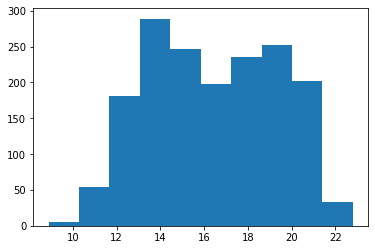

In [7]:
plt.hist(np.log(y))

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff545f7a4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff545f7ab20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff545f7a070>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff545f88280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff545f88610>],
 'means': []}

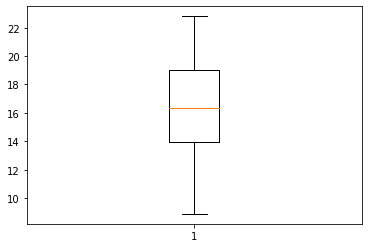

In [8]:
plt.boxplot(np.log(y))

In [9]:
y = np.log(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.25, random_state=0)
## oversample the 'yes' class so that both classes have the same number of data points
#oversample = RandomOverSampler(sampling_strategy=0.5)
#X_overtrain, y_overtrain = oversample.fit_resample(X_train, y_train)

# Random Forest

In [11]:


clf = tree.DecisionTreeRegressor( max_depth = 40, min_samples_split = 150)
clf = clf.fit(X_train, y_train)


y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)


print( mean_squared_error(y_pred_train, y_train) )
print( mean_squared_error(y_pred_test, y_test) )

print( r2_score(y_pred_train, y_train) )
print( r2_score(y_pred_test, y_test) )



1.0948482749575161
1.2090104560339157
0.8565673765713084
0.8367997847711


In [12]:
importances = clf.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.0064843 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.85192398, 0.14159172])

In [13]:
clf.get_depth()

5